### LSE Data Analytics Online Career Accelerator 

### DA301: Advanced Analytics for Organisational Impact

### Scenario:
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- **Assignment Activity One:** How do customers accumulate loyalty points?
- **Assignment Activity Two:** How useful are remuneration and spending scores data?
- **Assignment Activity Three:** Can social data (e.g. customer reviews) be used in marketing campaigns?
- **Assignment Activity Four:** What is the impact on sales per product?
- **Assignment Activity Five:** The reliability of the data (e.g. normal distribution, Skewness, Kurtosis).
- **Assignment Activity Six:** If there is any possible relationship(s) in sales between North America, Europe, and global sales.

# Assignment Activity One:

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
import sklearn

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

In [2]:
# Load the CSV file as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame shape and head.
print("The DataFrame shape:", reviews.shape)
reviews.head()

The DataFrame shape: (2000, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine whether the reviews DataFrame contains missing values.
reviews_mv = reviews.isnull().sum()
sum_reviews_mv = reviews_mv.sum()

# View the sum of missing values.
print("The sum of missing values for the reviews DataFrame is", sum_reviews_mv)

The sum of missing values for the reviews DataFrame is 0


In [4]:
# Identify duplicates in the reviews DataFrame.
reviews_duplicates = reviews.duplicated(keep='first')

# Count the number of duplicate rows.
reviews_total_duplicate = reviews_duplicates.sum()

# View the number of duplicates.
print("The total number of duplicate rows is", reviews_total_duplicate)

The total number of duplicate rows is 0


In [5]:
# View the data types for each column of the reviews DataFrame.
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [6]:
# View the metadata of the reviews DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# View the descriptive statistics of the reviews DataFrame.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [8]:
# Remove the redundant columns from the reviews DataFrame.
reviews_remove_col = ['language', 'platform']
reviews_dropped_col = reviews.drop(columns=reviews_remove_col)

# View the reviews_drop_col DataFrame columns to check that 'language' and 'platform' have been removed.
reviews_dropped_col.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [9]:
# Rename the 'remuneration (k£)' and 'spending_score (1-100)' column names.
reviews_cleaned = reviews_dropped_col.rename(columns={'remuneration (k£)': 'remuneration', 
                                                   'spending_score (1-100)': 'spending_score'})

# View the reviews_cleaned DataFrame column names.
reviews_cleaned.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [10]:
# Save the reviews_cleaned DataFrame to a CSV file
reviews_cleaned.to_csv('reviews_cleaned.csv', index=False)

In [11]:
# Import the reviews_cleaned.csv file so it can be sense-checked.
reviews_final = pd.read_csv('reviews_cleaned.csv')

# View the reviews_final DataFrame shape and head.
print("The DataFrame shape:", reviews_final.shape)
reviews_final.head()

The DataFrame shape: (2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# View the data types for each column of the reviews_final DataFrame.
reviews_final.dtypes

gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object

**Age vs Loyalty Points:**

In [13]:
# Specify the independent and dependent variables.
x = reviews_final['age']
y = reviews_final['loyalty_points']

# Create a 'y ~ x' formula and the OLS model.  
f = 'y ~ x'
age_ols = ols(f, data = reviews_final).fit()

# View the regression table.
print(age_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 08 Oct 2023   Prob (F-statistic):             0.0577
Time:                        23:43:11   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

The low R-squared and F-statistic values illustrate that the regression model does not fit well when looking at ‘Age vs Loyalty Points’. While the intercept demonstrates statistical importance, the x-coefficient shows little significance. The model’s fit has problems, highlighted by the residual’s deviation from the assumption of normality. Therefore, an improvement to the model is needed to have a better understanding of the relationship between age and loyalty points.

In [14]:
# Extract the estimated parameters.
print("Parameters:", age_ols.params)

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64


In [15]:
# Extract the standard errors.
print("Standard errors:", age_ols.bse)  

Standard errors: Intercept    88.248731
x             2.113177
dtype: float64


In [16]:
# Extract the predicted values.
print("Predicted values:", age_ols.predict())

Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [17]:
# Create the linear regression model.
# Set the X coefficient and the constant.
age_y_pred = (1736.517739) + 4.012805 * reviews_final['age']

# View the output.
age_y_pred

0       1808.748229
1       1828.812254
2       1824.799449
3       1836.837864
4       1868.940304
           ...     
1995    1884.991524
1996    1909.068354
1997    1872.953109
1998    1872.953109
1999    1864.927499
Name: age, Length: 2000, dtype: float64

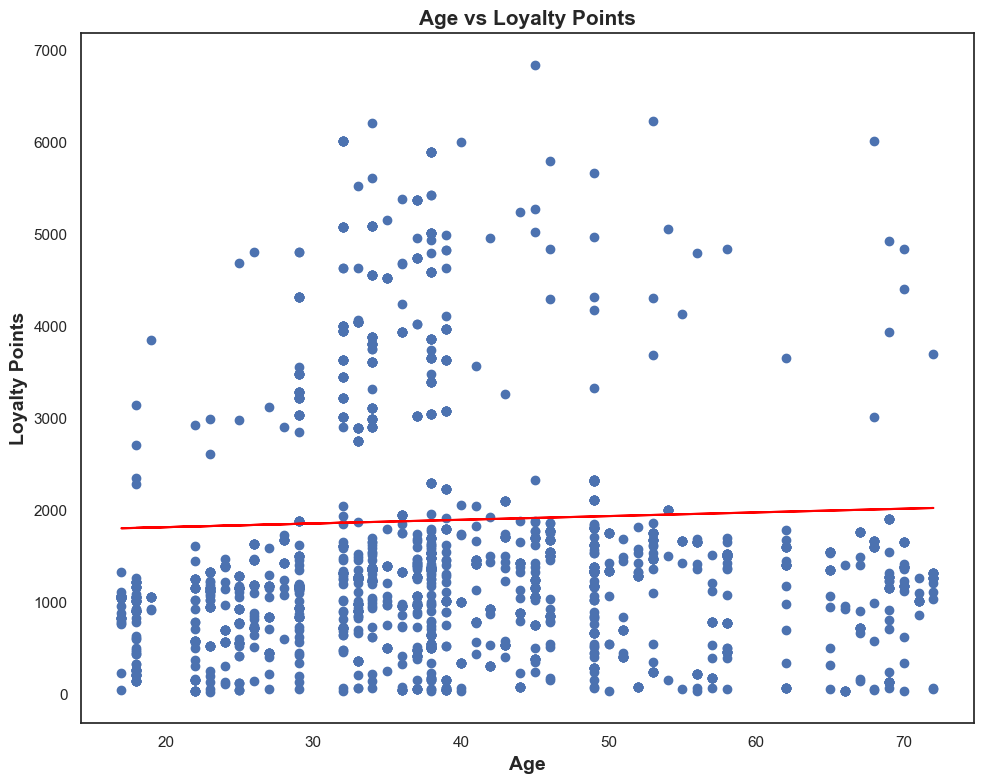

In [18]:
# Plot the data points with a scatterplot.
age_loyalty = plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, age_y_pred, color='red')

# Add a title and labels.
plt.title('Age vs Loyalty Points', fontsize=15, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Loyalty Points', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the scatterplot.
plt.savefig('age_vs_loyalty.png', dpi=72)

**Remuneration vs Loyalty Points:**

In [19]:
# Specify the independent and dependent variables.
x = reviews_final['remuneration']
y = reviews_final['loyalty_points']

# Create a 'y ~ x' formula and the OLS model.  
f = 'y ~ x'
remuneration_ols = ols(f, data = reviews_final).fit()

# View the regression table.
print(remuneration_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        23:43:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In this OLS regression analysis, the R-squared value is 0.38, meaning the independent variable (remuneration [x]) explains 38% of the changes to the dependant variable (loyalty point [y]). The x-coefficient is significant, illustrating a considerable impact on the dependant variable.  While the intercepts impact is unclear, the F-statistic shows an overall significance of the model. Finally, a further investigation is needed, as the residuals highlight signs of non-normality.

In [20]:
# Extract the estimated parameters.
print("Parameters:", remuneration_ols.params)  

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64


In [21]:
# Extract the standard errors.
print("Standard errors:", remuneration_ols.bse)  

Standard errors: Intercept    52.170717
x             0.977925
dtype: float64


In [22]:
# Extract the predicted values.
print("Predicted values:", remuneration_ols.predict())

Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [23]:
# Create the linear regression model.
# Set the X coefficient and the constant.
remuneration_y_pred = (-65.686513) + 34.187825 * reviews_final['remuneration']

# View the output.
remuneration_y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

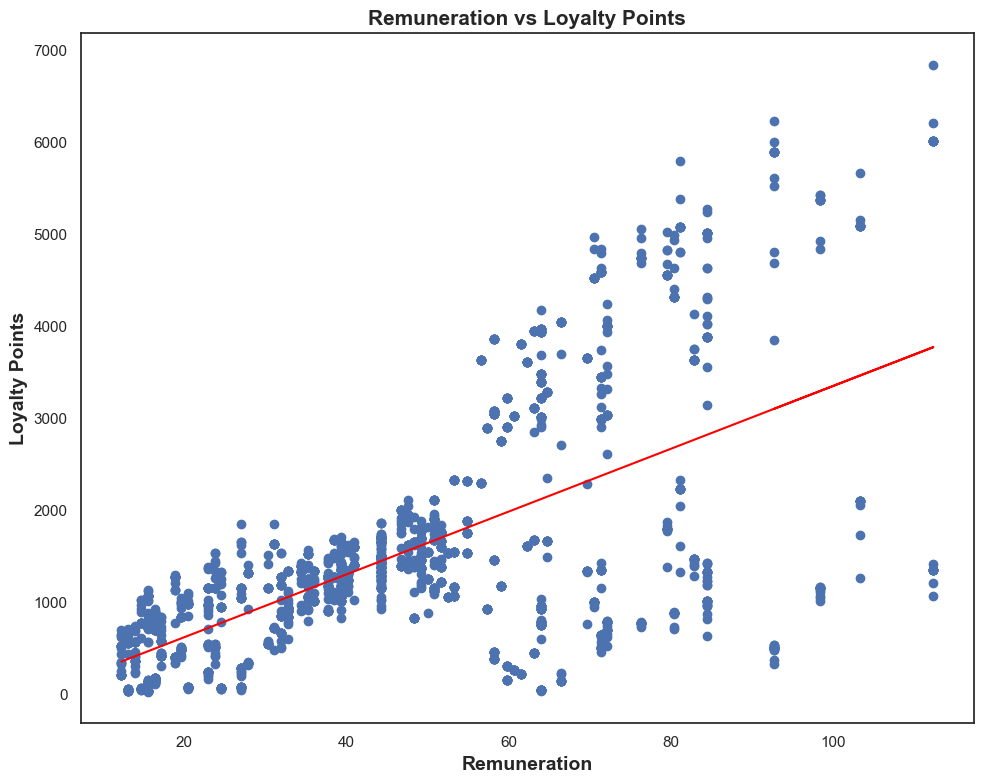

In [24]:
# Plot the data points with a scatterplot.
remuneration_loyalty = plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, remuneration_y_pred, color='red')

# Add a title and labels.
plt.title('Remuneration vs Loyalty Points', fontsize=15, fontweight='bold')
plt.xlabel('Remuneration', fontsize=14, fontweight='bold')
plt.ylabel('Loyalty Points', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the scatterplot.
plt.savefig('remuneration_vs_loyalty.png', dpi=72)

**Spending Score vs Loyalty Points:**

In [25]:
# Specify the independent and dependent variables.
x = reviews_final['spending_score']
y = reviews_final['loyalty_points']

# Create a 'y ~ x' formula and the OLS model.  
f = 'y ~ x'
spending_ols = ols(f, data = reviews_final).fit()

# View the regression table.
print(spending_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        23:43:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In summary, the linear regression model shows that the independent variable (spending score [x]) explains 45.2% of the changes to the dependent variable (loyalty points [y]). Furthermore, the x-coefficient is statistically significant. However, the Omnibus, Jarque-Bera, and Durbin-Watson tests highlight uncertainly over whether the model’s assumptions were met, meaning a further analysis and a more sophisticated model is needed to better understand the relationship between spending score and loyalty points.

In [26]:
# Extract the estimated parameters.
print("Parameters:", spending_ols.params)

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64


In [27]:
# Extract the standard errors.
print("Standard errors:", spending_ols.bse)

Standard errors: Intercept    45.930554
x             0.814419
dtype: float64


In [28]:
# Extract the predicted values.
print("Predicted values:", spending_ols.predict())

Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [29]:
# Create the linear regression model.
# Set the X coefficient and the constant.
spending_y_pred = (-75.052663) + 33.061693 * reviews_final['spending_score']

# View the output.
spending_y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

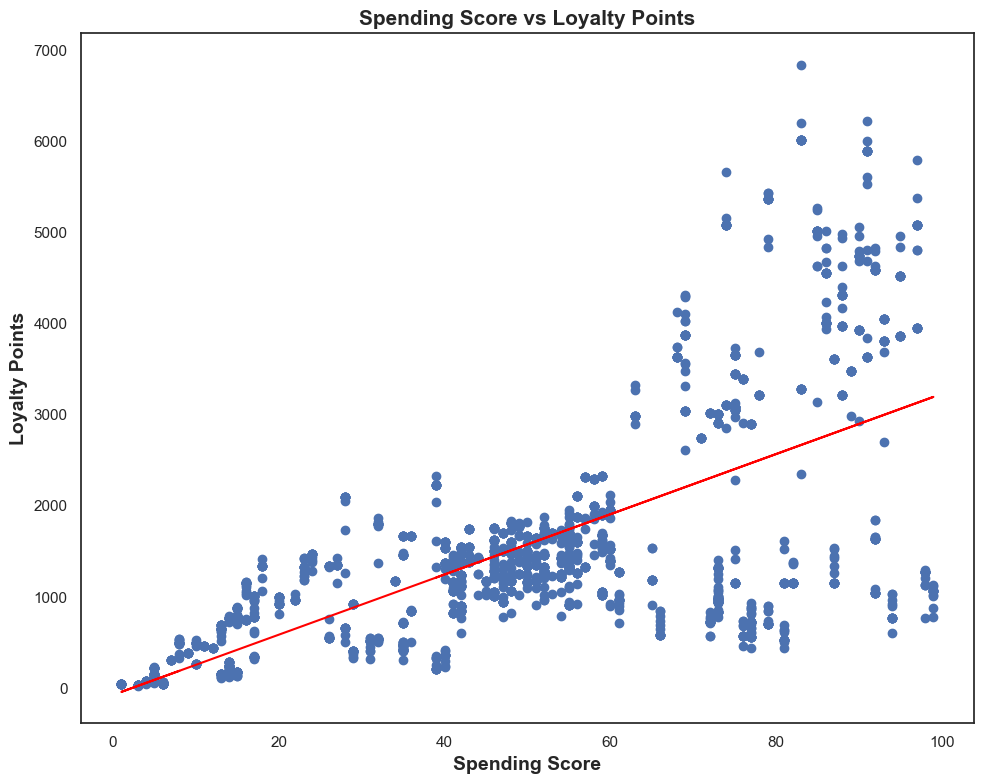

In [30]:
# Plot the data points with a scatterplot.
spending_loyalty = plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, spending_y_pred, color='red')

# Add a title and labels.
plt.title('Spending Score vs Loyalty Points', fontsize=15, fontweight='bold')
plt.xlabel('Spending Score', fontsize=14, fontweight='bold')
plt.ylabel('Loyalty Points', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the scatterplot.
plt.savefig('spending_vs_loyalty.png', dpi=72)

**Multiple Linear Regression (MLR):**

In [31]:
# Specify the independent and dependent variables.
X = reviews_final[['age', 'remuneration', 'spending_score']]
y = reviews_final['loyalty_points']

# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [32]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [33]:
# View the R-squared value.
print("R-squared:", mlr.score(X,y))  

# View the intercept.
print("Intercept:", mlr.intercept_) 

# View the coefficients.
print("Coefficients:", list(zip(X, mlr.coef_)))

R-squared: 0.8399114912748795
Intercept: -2203.059751307901
Coefficients: [('age', 11.060658711843338), ('remuneration', 34.008385492602514), ('spending_score', 34.183196577633666)]


In [34]:
# Split the data into train (80%) and test (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [35]:
# Train the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# View the regression table.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:43:13   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

In [36]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model.
mlr.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# View the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [38]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# View the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03


In [39]:
# View the R-squared value.
print(mlr.score(X_test, Y_test))  

0.853050388163067


In [40]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the variance inflation factor (VIF) for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns  

# View the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       21.29           const
1        1.05             age
2        1.00    remuneration
3        1.06  spending_score


The variables have little to no multicollinearity.

In [41]:
# Run the Breusch-Pagan test function on the model's residuals and x-variables.
model = sms.het_breuschpagan(model.resid, model.model.exog)

# View the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 30.386096853867883, 'LM Test p-value': 1.144632652092354e-06, 'F-stat': 10.298968105376614, 'F-test p-value': 1.026336544830792e-06}


The very low LM Test p-value and the F-test p-value means heteroscedasticity is present in the MLR model.

In [42]:
# Call the ‘metrics.mean_absolute_error’ function and view the output.
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function and view the output.
print("Mean Square Error:", metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error: 425.48679627595675
Mean Square Error: 301956.0390785325


For the MLR model, the R-squared value calculated on the test set is 0.85, meaning that the three independent variables (age, remuneration, and spending score) are statistically significant predictors of the dependant variable (loyalty points). The low Variance Inflation Factor (VIF) values for each independent variable illustrates that multicollinearity is not an issue for this model. However, heteroscedasticity is present in the model as demonstrated by the very low LM Test p-value and the F-test p-value. Finally, the Mean Absolute Error (MAE) and Mean Square Error (MSE) values indicate that it is possible to predict loyalty points with a significant level of accuracy. However, the moderately high MSE value suggests that some substantial errors occur, illustrating that a further analysis and possible improvements to the model are needed to improve its accuracy.

# Assignment Activity Two:

In [43]:
# Import necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.spatial.distance import cdist

In [44]:
# Load the CSV file as df2.
df2 = pd.read_csv('reviews_cleaned.csv')

# View the df2 DataFrame shape and head.
print("The DataFrame shape:", df2.shape)
df2.head()

The DataFrame shape: (2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [45]:
# Keep only the remuneration and spending_score columns.
df2_final = df2[['remuneration', 'spending_score']]

# View the df2 DataFrame head.
df2_final.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [46]:
# View the metadata of the df2 DataFrame.
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [47]:
# View the descriptive statistics of the df2 DataFrame.
df2_final.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


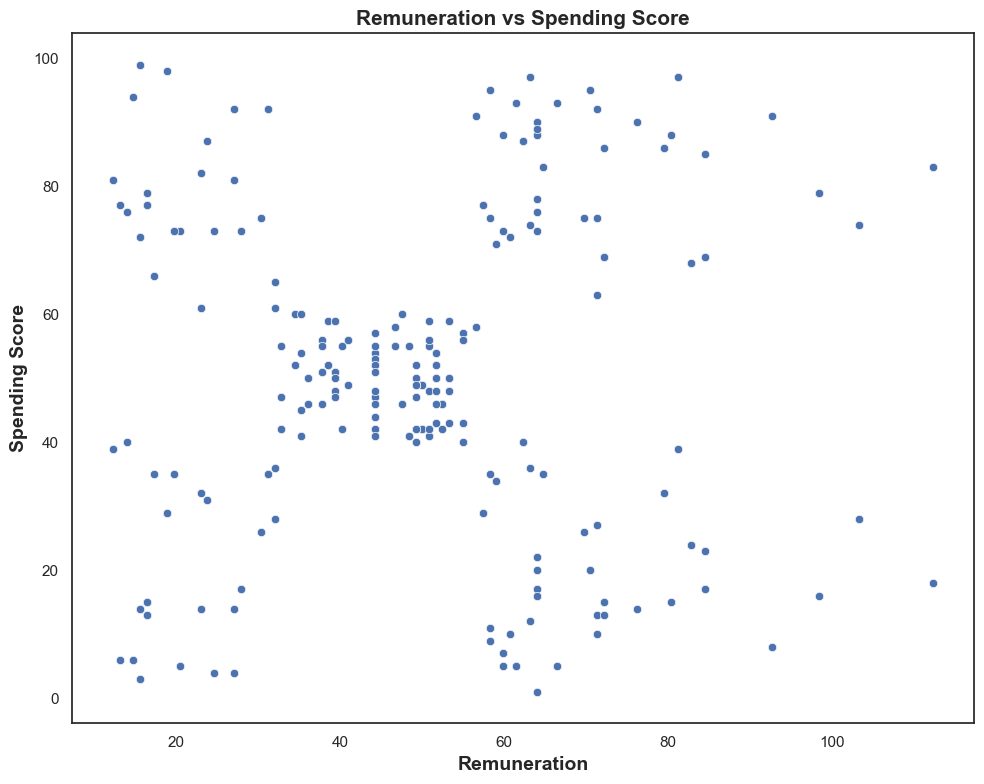

In [48]:
# Create a scatterplot of remuneration vs spending_score.
remuneration_spending = sns.scatterplot(data=df2_final, x='remuneration', y='spending_score')

# Add a title and labels.
plt.title('Remuneration vs Spending Score', fontsize=15, fontweight='bold')
plt.xlabel('Remuneration', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the scatterplot.
plt.savefig('remuneration_vs_spending.png', dpi=72)

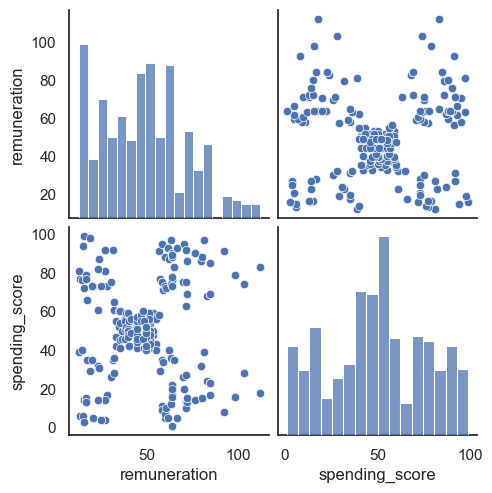

In [49]:
# Create a pairplot of remuneration vs spending_score.
pairplot = sns.pairplot(df2_final)

# Save the pairplot.
plt.savefig('remuneration_spending_pairplot.png', dpi=72)

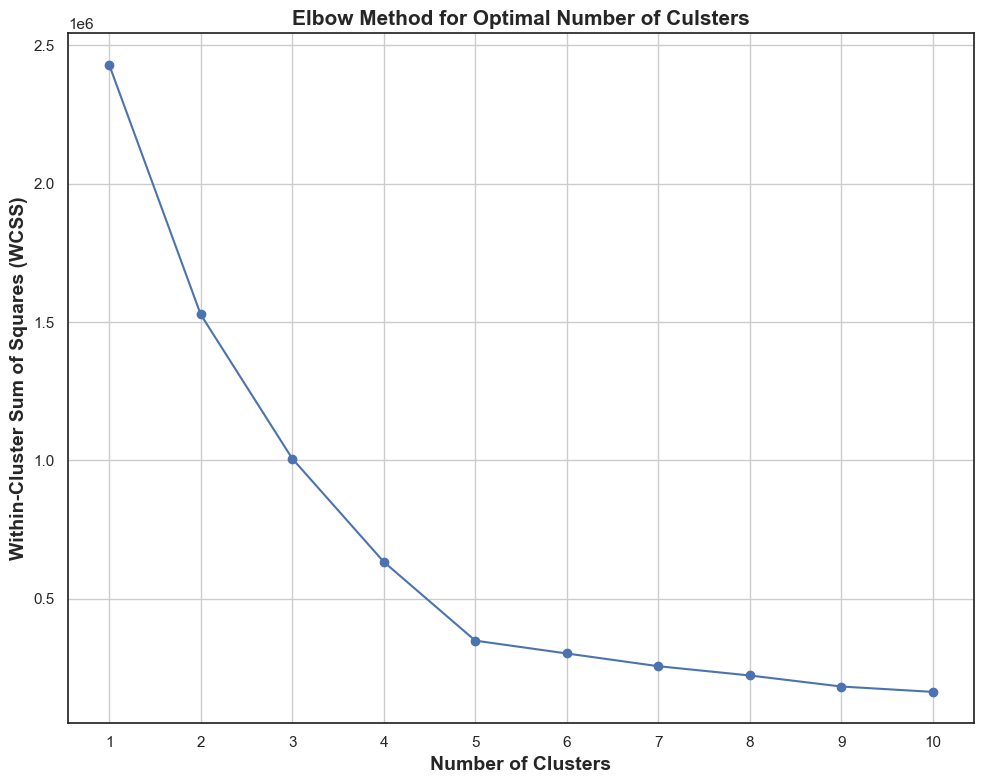

In [50]:
# Determine the number of clusters: Elbow method.
# Extracte the data values from the df2_final DataFrame.
data_elbow = df2_final.values

# Initialise an empty list to store Within-Cluster Sum of Squares (WCSS) values for different k values.
wcss = []

# Try different values of k (number of clusters).
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_elbow)
    # Append the WCSS value to the list.
    wcss.append(kmeans.inertia_)
    
# Plot the elbow curve.
elbow_plot = plt.plot(range(1, 11), wcss, marker='o')

# Add a title, labels and grid.
plt.title('Elbow Method for Optimal Number of Culsters', fontsize=15, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14, fontweight='bold')
plt.grid()

# Adjust the tick intervals for the x-axis.
plt.xticks(np.arange(1, 11, step=1))

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the plot.
plt.savefig('elbow_method_plot.png', dpi=72)

As the 'elbow' (the point in which the line levels off) generally indicates the optimal number of clusters, the above plot shows that k=5 is the optimal number of clusters.

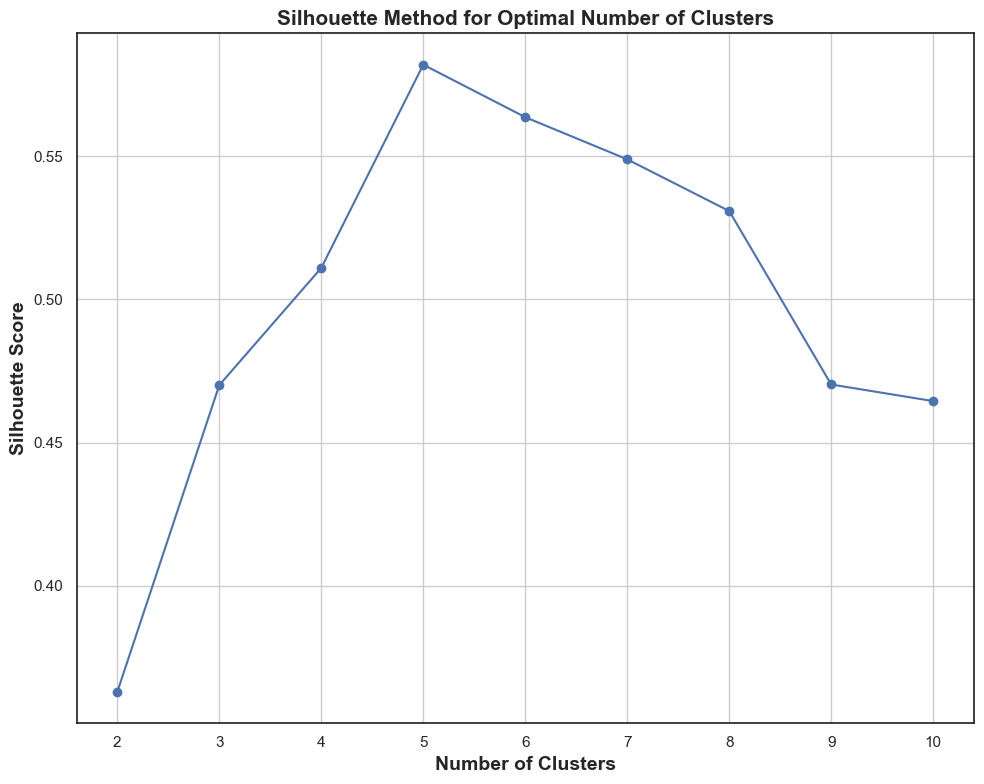

In [51]:
# Determine the number of clusters: Silhouette method.
# Extract the data values from the df2_final DataFrame.
data_silhouette = df2_final.values

# Standardise the data for better results.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_silhouette)

# Initialise an empty list to store silhouette scores.
silhouette_scores = []

# Set a cluster range.
clusters = range(2, 11)

# Try different values of k (number of clusters).
for k in clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    # Calculate the silhouette score.
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores.
silhouette_plot = plt.plot(clusters, silhouette_scores, marker='o')

# Add a title, labels, and grid.
plt.title('Silhouette Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=14, fontweight='bold')
plt.grid()

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the plot.
plt.savefig('silhouette_method_plot.png', dpi=72)

A higher silhouette score usually indicates better-defined clusters. Therefore, the above plot shows that k=5 is the optimal number of clusters.

**Evaluate k-means model at different values of k:**

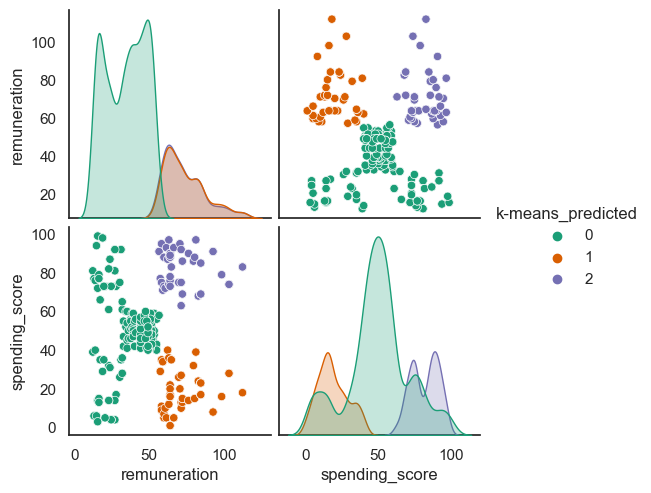

In [52]:
# Use three clusters.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)
k3_labels = kmeans.labels_

# Add cluster labels to the DataFrame.
df2_final['k-means_predicted'] = k3_labels

# Create a pairplot.
k3_plot = sns.pairplot(df2_final, hue='k-means_predicted', diag_kind='kde', palette='Dark2')

# Save the pairplot.
plt.savefig('k3_pairplot.png', dpi=72)

In [53]:
# Check the number of observations per predicted class.
df2_final['k-means_predicted'].value_counts()

k-means_predicted
0    1293
2     356
1     351
Name: count, dtype: int64

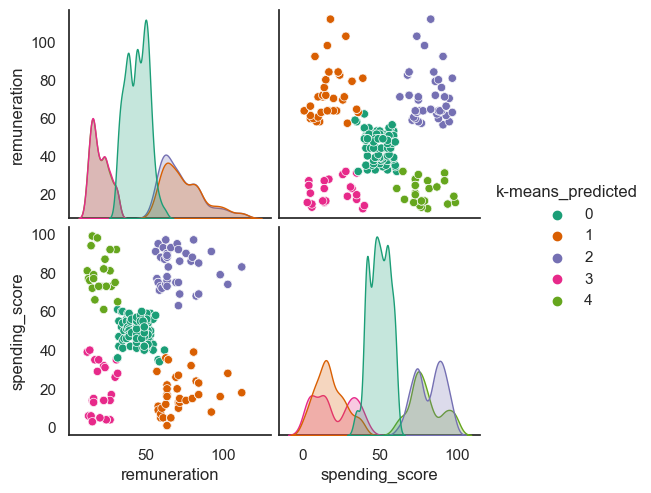

In [54]:
# Use five clusters.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)
k5_labels = kmeans.labels_

# Add cluster labels to the DataFrame.
df2_final['k-means_predicted'] = k5_labels

# Create a pairplot.
k5_plot = sns.pairplot(df2_final, hue='k-means_predicted', diag_kind='kde', palette='Dark2')

# Save the pairplot.
plt.savefig('k5_pairplot.png', dpi=72)

In [55]:
# Check the number of observations per predicted class.
df2_final['k-means_predicted'].value_counts()

k-means_predicted
0    774
2    356
1    330
3    271
4    269
Name: count, dtype: int64

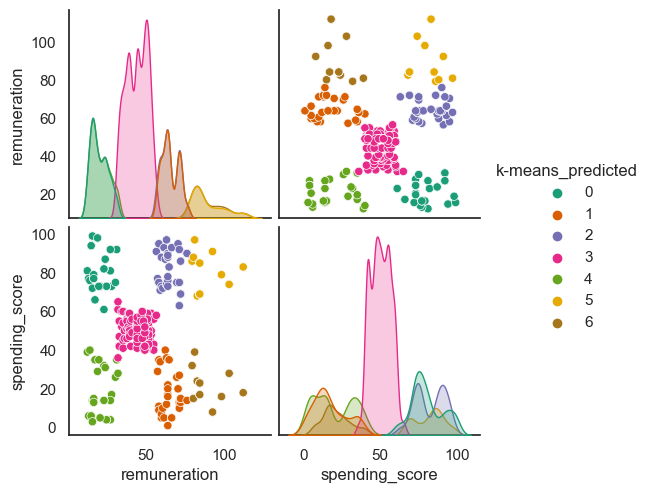

In [56]:
# Use seven clusters.
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)
k7_labels = kmeans.labels_

# Add cluster labels to the DataFrame.
df2_final['k-means_predicted'] = k7_labels

# Create a pairplot.
k7_plot = sns.pairplot(df2_final, hue='k-means_predicted', diag_kind='kde', palette='Dark2')

# Save the pairplot.
plt.savefig('k7_pairplot.png', dpi=72)

In [57]:
# Check the number of observations per predicted class.
df2_final['k-means_predicted'].value_counts()

k-means_predicted
3    763
4    271
0    259
2    238
1    228
6    123
5    118
Name: count, dtype: int64

Using k=3 offers a straightforward and easily understandable clustering solution. The simplicity that derives from selecting k=3 means stakeholders can form a clear understanding of the outcomes, enabling for high-level conclusions to be made. Furthermore, when using a lower number of clusters, the risk of overfitting is reduced, meaning the results are more dependable. However, a lower number of clusters also has limitations, such as the loss of the data’s finer details when presented. For example, when looking at the bottom-left graph of the pairplot, data points with a renumeration value below around 58, or more simply the left side of the graph, are all grouped into one cluster. However, it is clear from the graph that this cluster could be split into three smaller clusters. 

Selecting k=7 provides a high level of complexity in the clustering solution. More clusters means that subtle patterns within the data can be detected, possibly resulting in important conclusions being drawn from its underlying structure. Thus, a larger number of clusters might present relationships and differences that would not be possible with a smaller value of k. However, k=7 could result in overfitting because small fluctuations with little meaning might be captured. Furthermore, interpreting larger numbers of clusters becomes more difficult, which could negatively impact my analysis and the stakeholder’s capability of understanding the data if they do not have a background in data analytics. 

Choosing k=5 provides an effective balance between presenting the finer details and preserving comprehensibility. When looking at the bottom-left graph of the pairplot, five clearly defined clusters are present. Furthermore, the elbow method and silhouette method also highlight k=5 as the optimal number of clusters for this data. Finally, out of the three values of k that I have chosen to explore, k=5 has the best balance in the distribution of data points in each cluster, resulting in a fairer depiction of the data. Therefore, I have decided to use k=5. 

**The use of k=5:**

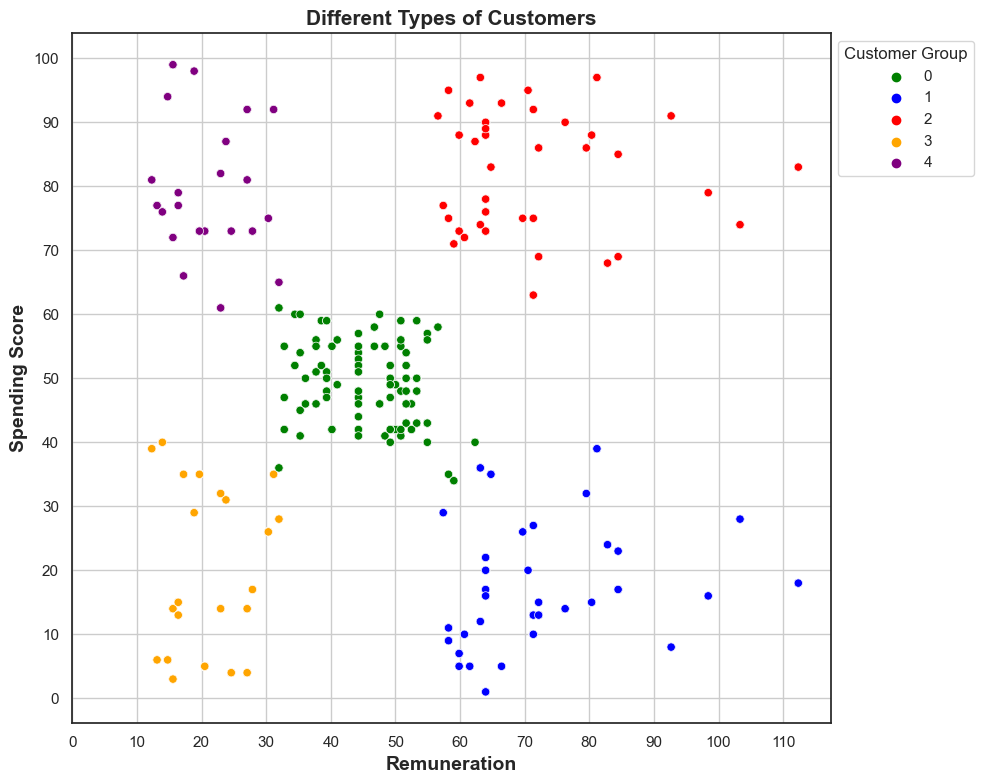

In [58]:
# Add k=5 cluster labels to the DataFrame.
df2_final['k-means_predicted'] = k5_labels

# Define a custom coluor palette.
custom_palette = ["Green", "Blue", "Red", "Orange", "Purple"]

# Create a scatterplot.
k5_scatterplot = sns.scatterplot(x='remuneration', y='spending_score', hue='k-means_predicted', 
                                 data=df2_final, palette=custom_palette)

# Add a title, labels, grid, and legend.
plt.title('Different Types of Customers', fontsize=15, fontweight='bold')
plt.xlabel('Remuneration', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score', fontsize=14, fontweight='bold')
plt.grid()
plt.legend(title='Customer Group', bbox_to_anchor=(1,1), loc='upper left')

# Adjust the tick intervals on both axes.
plt.xticks(range(0, 120, 10))  
plt.yticks(range(0, 110, 10))  

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the scatterplot.
k5_scatterplot.figure.savefig('k5_scatterplot.png', dpi=72)

In [59]:
# Calculate ranges for each cluster.
cluster_ranges = []
for cluster_id in range(5):
    cluster_data = df2_final[df2_final['k-means_predicted'] == cluster_id]
    x_min, x_max = cluster_data['remuneration'].min(), cluster_data['remuneration'].max()
    y_min, y_max = cluster_data['spending_score'].min(), cluster_data['spending_score'].max()
    cluster_ranges.append((x_min, x_max, y_min, y_max))

# View the cluster ranges.
print("Cluster Ranges:")
for cluster_id, (x_min, x_max, y_min, y_max) in enumerate(cluster_ranges):
      print(f"Cluster {cluster_id}: Remuneration Range "
            f"({x_min:.2f}, {x_max:.2f}), Spending Score Range "
            f"({y_min:.0f}, {y_max:.0f})")

Cluster Ranges:
Cluster 0: Remuneration Range (31.98, 62.32), Spending Score Range (34, 61)
Cluster 1: Remuneration Range (57.40, 112.34), Spending Score Range (1, 39)
Cluster 2: Remuneration Range (56.58, 112.34), Spending Score Range (63, 97)
Cluster 3: Remuneration Range (12.30, 31.98), Spending Score Range (3, 40)
Cluster 4: Remuneration Range (12.30, 31.98), Spending Score Range (61, 99)


**Cluster 0 (Middle Earners Middle Spenders):**
Cluster 0 has the largest number of customers (774). These types of customers might go through a thinking process before buying a product, as they will consider whether they can afford the item and whether they need the item straightaway. Discounts and the possibility to place items on hold could be attractive to these types of customers.  

**Cluster 1 (High Earners Low Spenders):**
Cluster 1 has the third largest number of customers (330). Although these customers have a high income, they spend more conservatively. These types of customers might appreciate long-term benefits. A system that links together loyalty points with better discounts could get these customers to spend more, as higher discount offers are very attractive to these types of customers.

**Cluster 2 (High Earners High Spenders):**
Cluster 2 has the second highest number of customers (356). These 'high-value' customers might care less about discounts than other types of customers. Instead, early access to items could attract these customers and is also a possibility for improving sales, as an added charge can be included for early access. 

**Cluster 3 (Low Earners Low Spenders):**
Cluster 3 has the fourth highest number of customers (271). These customers will most likely search for discounts when it comes to books, games, and toys. To target this group of customers, marketing efforts should focus on discounts, budget-friendly options, and economic bundles.

**Cluster 4 (Low Earners High Spenders):**
Cluster 4 has the smallest number of customers (269). These types of customers are dedicated supporters of the franchises of books, games, and toys they buy, as they are willing to spend a significant amount of their income on these items. Providing these types of customers with the possibility of flexible payment options, early access, and sale events will most likely be popular.

In [60]:
# View the reviews_cleaned DataFrame shape and head.
print("The DataFrame shape:", reviews_cleaned.shape)
reviews_cleaned.head()

The DataFrame shape: (2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [61]:
# Keep only the age, remuneration, and spending_score columns.
df2_extra = reviews_cleaned[['age', 'remuneration', 'spending_score', 'loyalty_points']]

# View the df2_extra DataFrame head.
df2_extra.head()

,age,remuneration,spending_score,loyalty_points
0,18,12.30,39,210
1,23,12.30,81,524
2,22,13.12,6,40
3,25,13.12,77,562
4,33,13.94,40,366


In [62]:
# Add cluster labels to the DataFrame.
df2_extra['k-means_predicted'] = k5_labels

# View the df2_extra DataFrame head.
df2_extra.head()

,age,remuneration,spending_score,loyalty_points,k-means_predicted
0,18,12.30,39,210,3
1,23,12.30,81,524,4
2,22,13.12,6,40,3
3,25,13.12,77,562,4
4,33,13.94,40,366,3


In [63]:
# Check that the number of observations per predicted class is the same as when previously using k=5.
df2_extra['k-means_predicted'].value_counts()

k-means_predicted
0    774
2    356
1    330
3    271
4    269
Name: count, dtype: int64

In [64]:
# Find the average age and loyalty points per cluster.
avg_per_cluster = df2_extra.groupby('k-means_predicted')[['age', 'loyalty_points']].mean().round(2)

# View the average age and loyalty points per cluster.
print(avg_per_cluster)

                     age  loyalty_points
k-means_predicted                       
0                  42.13         1420.38
1                  40.67          911.76
2                  35.59         3988.24
3                  43.51          275.06
4                  31.60          971.94


Cluster 3 (Low Earners Low Spenders) has the highest average age and the lowest average loyalty points.

Cluster 2 (High Earners High Spenders) has the fourth highest average age and the highest average loyalty points .

Cluster 4 (Low Earners High Spenders) has the lowest average age and the third highest average loyalty points.

# Assignment Activity Three:

In [65]:
# Import necessary libraries.
import nltk
import string

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

In [66]:
# Use the reviews_cleaned DataFrame to create a new DataFrame with the review and summary columns.
df3 = reviews_cleaned[['review', 'summary']]

# View the df3 DataFrame shape and head.
print("The DataFrame shape:", df3.shape)
df3.head()

The DataFrame shape: (2000, 2)


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [67]:
# Determine whether the df3 DataFrame contains missing values.
df3_mv = df3.isnull().sum()
sum_df3_mv = df3_mv.sum()

# View the sum of missing values.
print("The sum of missing values for the reviews DataFrame is", sum_df3_mv)

The sum of missing values for the reviews DataFrame is 0


In [68]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [69]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [70]:
# Review: Remove punctuation.
df3['review'] = df3['review'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [71]:
# Summary: Remove punctuation.
df3['summary'] = df3['summary'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [72]:
# Review: Check the number of duplicate values.
df3.review.duplicated().sum()

50

In [73]:
# Summary: Check the number of duplicate values.
df3.summary.duplicated().sum()

649

In [74]:
# Drop duplicates in both columns seperately.
df3.drop_duplicates(subset=['review'], inplace=True)
df3.drop_duplicates(subset=['summary'], inplace=True)

# Reset the index.
df3.reset_index(drop=True, inplace=True)

# View the df3 DataFrame shape and head.
print("The DataFrame shape:", df3.shape)
df3.head()

The DataFrame shape: (1349, 2)


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [75]:
# Create a copy of the DataFrame.
df3_copy = df3.copy()

# View the df3_copy DataFrame head.
df3_copy.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [76]:
# Apply tokenisation on the review and summary columns.
df3_copy['review_tokens'] = df3_copy['review'].apply(word_tokenize)
df3_copy['summary_tokens'] = df3_copy['summary'].apply(word_tokenize)

# View the df3_copy DataFrame head.
df3_copy.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


**Word Frequency:**

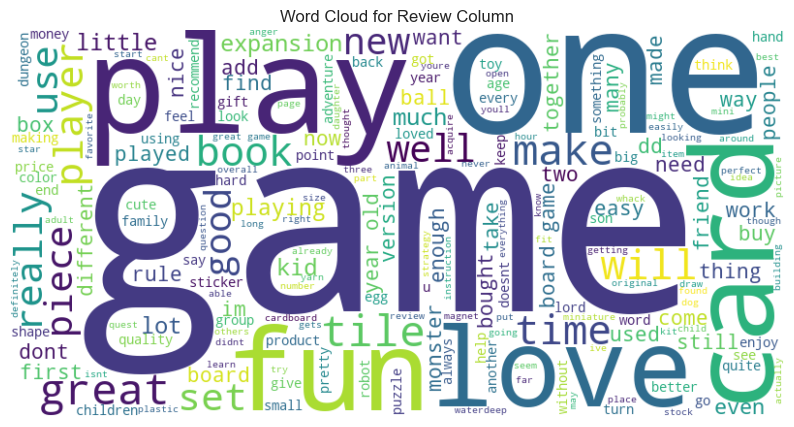

In [77]:
# Create a word cloud for the review column.
# Join the tokenised words back into a single string.
review_string = ' '.join(df3_copy['review_tokens'].sum())

# Create the word cloud.
review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_string)

# Plot the review word cloud.
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Review Column')
plt.axis('off')
plt.show()

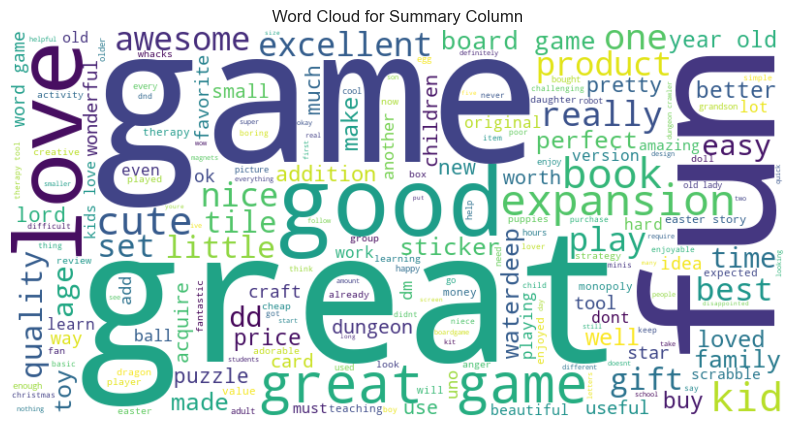

In [78]:
# Create a word cloud for the summary column.
# Join the tokenised words back into a single string.
summary_string = ' '.join(df3_copy['summary_tokens'].sum())

# Create the word cloud.
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_string)

# Plot the summary word cloud.
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Summary Column')
plt.axis('off')
plt.show()

In [79]:
# Create a frequency distribution for the review_tokens column.
review_freq_dist_all = FreqDist(df3_copy['review_tokens'].explode())

# View the frequency distribution for review.
print("Review Frequency Distribution:")
review_freq_dist_all

Review Frequency Distribution:


FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [80]:
# Create a frequency distribution for the summary_tokens column.
summary_freq_dist_all = FreqDist(df3_copy['summary_tokens'].explode())

# View the frequency distribution for summary.
print("Summary Frequency Distribution:")
summary_freq_dist_all

Summary Frequency Distribution:


FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [81]:
# Define a function to filter out alphanumeric characters and stopwords.
stop_words = set(stopwords.words('english'))

def filter_tokens(tokens):
    return [token for token in tokens if token.isalpha() and token not in stop_words]

# Apply the filter.
df3_copy['review_tokens_no_stopwords'] = df3_copy['review_tokens'].apply(filter_tokens)
df3_copy['summary_tokens_no_stopwords'] = df3_copy['summary_tokens'].apply(filter_tokens)

(-0.5, 799.5, 399.5, -0.5)

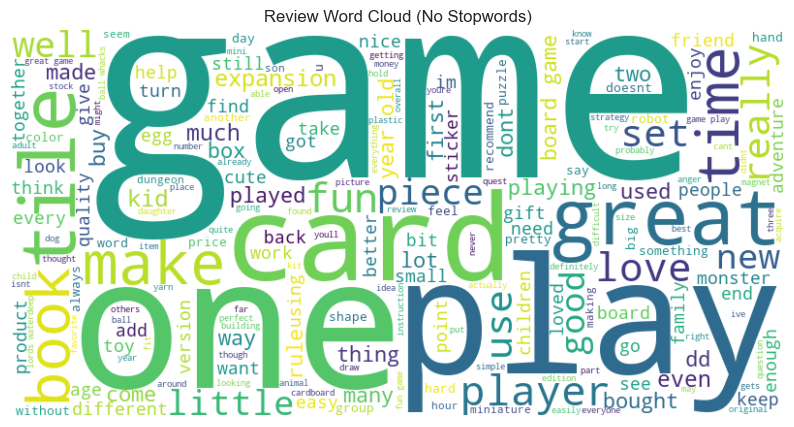

In [82]:
# Create a word cloud for review without stopwords.
# Join the tokenised words back into a single string.
review_string2 = ' '.join(df3_copy['review_tokens_no_stopwords'].sum())

# Create the word cloud.
review_no_stopwords_wordcloud = WordCloud(width=800, height=400, 
                                          background_color='white').generate(review_string2)

# Plot the word cloud without stopwords.
plt.imshow(review_no_stopwords_wordcloud, interpolation='bilinear')
plt.title('Review Word Cloud (No Stopwords)')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

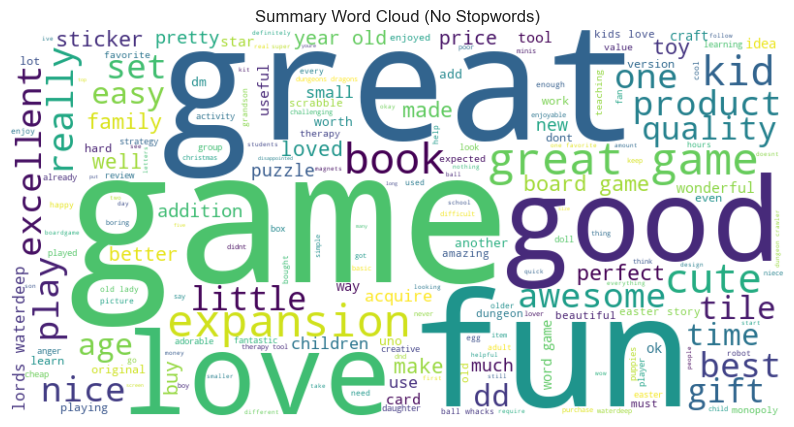

In [83]:
# Create a word cloud for summary without stopwords.
# Join the tokenised words back into a single string.
summary_string2 = ' '.join(df3_copy['summary_tokens_no_stopwords'].sum())

# Create the word cloud.
summary_no_stopwords_wordcloud = WordCloud(width=800, height=400, 
                                          background_color='white').generate(summary_string2)

# Plot the word cloud without stopwords.
plt.imshow(summary_no_stopwords_wordcloud, interpolation='bilinear')
plt.title('Summary Word Cloud (No Stopwords)')
plt.axis('off')

In [84]:
# Tokenise the combined review string into words.
review_words = nltk.word_tokenize(review_string2)

# Create a frequency distribution.
review_freq_dist = FreqDist(review_words)

# Determine the 15 most common words for the review column.
common_review_words = [word for word, _ in review_freq_dist.most_common(15)]

# Create a DataFrame with the top 15 words and their counts for review.
top_review_words = pd.DataFrame({'Word': common_review_words, 
                                 'Count': [review_freq_dist[word] for word in common_review_words]})

# Set the Word column as the index for the top_review_words DataFrame.
top_review_words.set_index('Word', inplace=True)

# View the top_review_words DataFrame.
print("Top 15 Review Words with Count:")
top_review_words

Top 15 Review Words with Count:


,Count
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


In [85]:
# Tokenise the combined summary string into words.
summary_words = nltk.word_tokenize(summary_string2)

# Create a frequency distribution.
summary_freq_dist = FreqDist(summary_words)

# Determine the 15 most common words for the summary column.
common_summary_words = [word for word, _ in summary_freq_dist.most_common(15)]

# Create a DataFrame with the top 15 words and their counts for summary.
top_summary_words = pd.DataFrame({'Word': common_summary_words, 
                                  'Count': [summary_freq_dist[word] for word in common_summary_words]})

# Set the Word column as the index for the top_summary_words DataFrame.
top_summary_words.set_index('Word', inplace=True)

# View the top_summary_words DataFrame.
print("Top 15 Summary Words with Count:")
top_summary_words

Top 15 Summary Words with Count:


,Count
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


**Sentiment Analysis:**

In [86]:
# Calculate sentiment polarity for the top 15 words in the review column.
top15_review_sentiments = {word: TextBlob(word).sentiment.polarity for word in common_review_words}

# Calculate sentiment polarity for the top 15 words in the summary column.
top15_summary_sentiments = {word: TextBlob(word).sentiment.polarity for word in common_summary_words}

# View the sentiment polarity for the top 15 words for the review and sentiment columns.
print("Sentiment Polarity for the Top 15 Words in Review:")
print(top15_review_sentiments, '\n')
print("Sentiment Polarity for the Top 15 Words in Summary:")
print(top15_summary_sentiments)

Sentiment Polarity for the Top 15 Words in Review:
{'game': -0.4, 'one': 0.0, 'play': 0.0, 'fun': 0.3, 'great': 0.8, 'like': 0.0, 'get': 0.0, 'cards': 0.0, 'tiles': 0.0, 'really': 0.2, 'book': 0.0, 'would': 0.0, 'well': 0.0, 'time': 0.0, 'new': 0.13636363636363635} 

Sentiment Polarity for the Top 15 Words in Summary:
{'game': -0.4, 'great': 0.8, 'fun': 0.3, 'good': 0.7, 'love': 0.5, 'like': 0.0, 'kids': 0.0, 'book': 0.0, 'expansion': 0.0, 'cute': 0.5, 'old': 0.1, 'really': 0.2, 'set': 0.0, 'nice': 0.6, 'one': 0.0}


In [87]:
# Convert the list of tokens without stopwords to a string for the reviews.
df3_copy['review_no_stopwords'] = df3_copy['review_tokens_no_stopwords'].apply(lambda x: ' '.join(x))

# Convert the list of tokens without stopwords to a string for the summaries.
df3_copy['summary_no_stopwords'] = df3_copy['summary_tokens_no_stopwords'].apply(lambda x: ' '.join(x))

# View the df3_copy DataFrame head.
df3_copy.head()

,review,summary,review_tokens,summary_tokens,review_tokens_no_stopwords,summary_tokens_no_stopwords,review_no_stopwords,summary_no_stopwords
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...","[comes, dms, screen, space, screen, absolute, ...","[fact, space, wasted, art, terribly, informati...",comes dms screen space screen absolute premium...,fact space wasted art terribly informative nee...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...","[open, letter, unpainted, miniatures, bad, spe...","[another, worthless, dungeon, masters, screen]",open letter unpainted miniatures bad spell car...,another worthless dungeon masters screen
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]","[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]",nice art nice printing two panels filled gener...,pretty also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]","[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]",amazing buy bought gift new dm perfect,five stars
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]","[review, previous, screens, completely, unnece...","[money, trap]",review previous screens completely unnecessary...,money trap


In [88]:
# Test whether sentiment polarity works best without or with stopwords.
# Import random.
import random

# Select a random sample of 50 rows.
random.seed(42)  # Set a seed for reproducibility.
sample_size = 50
sample_indices = random.sample(range(len(df3_copy)), sample_size)

# Create a sample DataFrame.
sample_df = df3_copy.iloc[sample_indices].copy()  

# Create a function to calculate sentiment score using TextBlob.
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Calculate sentiment scores for the review column.
sample_df['review_sentiment'] = sample_df['review'].apply(calculate_sentiment)

# Calculate sentiment scores for the review_no_stopwords column.
sample_df['review_no_stopwords_sentiment'] = sample_df['review_no_stopwords'].apply(calculate_sentiment)

# Calculate sentiment scores for the summary column.
sample_df['summary_sentiment'] = sample_df['summary'].apply(calculate_sentiment)

# Calculate sentiment scores for the summary_no_stopwords column.
sample_df['summary_no_stopwords_sentiment'] = sample_df['summary_no_stopwords'].apply(calculate_sentiment)

# View the output.
for idx, row in sample_df.iterrows():
    print(f"Review (Sentiment Score: {row['review_sentiment']:.2f}): {row['review']}")
    print(f"Review (NO SW) (Sentiment Score: {row['review_no_stopwords_sentiment']:.2f}): {row['review_no_stopwords']}")
    print()
    print(f"Summary (Sentiment Score: {row['summary_sentiment']:.2f}): {row['summary']}")
    print(f"Summary (NO SW) (Sentiment Score: {row['summary_no_stopwords_sentiment']:.2f}): {row['summary_no_stopwords']}")
    print()

Review (Sentiment Score: -0.20): here is a tip toss out the rule about allowing players to use a dictionary we played one round and felt frustrated because players kept on using archaic words of which they had no idea even existed before they found them in the dictionary seriously it was pathetic i took some solace in that i won the game without having to lean on a crutch the game is kind of fun not as fun as five crowns however i guess there is some value in improving vocabulary skills
Review (NO SW) (Sentiment Score: -0.19): tip toss rule allowing players use dictionary played one round felt frustrated players kept using archaic words idea even existed found dictionary seriously pathetic took solace game without lean crutch game kind fun fun five crowns however guess value improving vocabulary skills

Summary (Sentiment Score: 0.00): delete one rule
Summary (NO SW) (Sentiment Score: 0.00): delete one rule

Review (Sentiment Score: 0.02): my 10 year old daughter loves it in an age of 

I have decided to calculate the sentiment score on the review and summary columns, rather than the review_no_stopwords and summary_no_stopwords columns, because the stopwords provide added context to each string of text. In any case, whether stopwords are used or not, it changes little to the overall sentiment.

In [89]:
# Calculate sentiment scores for the reviews.
df3_copy['review_sentiment_score'] = df3_copy['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate sentiment scores for the summaries.
df3_copy['summary_sentiment_score'] = df3_copy['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# View the df3_copy DataFrame head.
df3_copy.head()

,review,summary,review_tokens,summary_tokens,review_tokens_no_stopwords,summary_tokens_no_stopwords,review_no_stopwords,summary_no_stopwords,review_sentiment_score,summary_sentiment_score
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...","[comes, dms, screen, space, screen, absolute, ...","[fact, space, wasted, art, terribly, informati...",comes dms screen space screen absolute premium...,fact space wasted art terribly informative nee...,-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...","[open, letter, unpainted, miniatures, bad, spe...","[another, worthless, dungeon, masters, screen]",open letter unpainted miniatures bad spell car...,another worthless dungeon masters screen,0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]","[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]",nice art nice printing two panels filled gener...,pretty also pretty useless,0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]","[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]",amazing buy bought gift new dm perfect,five stars,0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]","[review, previous, screens, completely, unnece...","[money, trap]",review previous screens completely unnecessary...,money trap,-0.316667,0.00


In [90]:
# Use the describe function on the review_sentiment column to show the distribution and moments.
df3_copy['review_sentiment_score'].describe().round(2)

count    1349.00
mean        0.18
std         0.23
min        -1.00
25%         0.04
50%         0.15
75%         0.31
max         1.00
Name: review_sentiment_score, dtype: float64

Overall, the reviews within the dataset have a slightly positive sentiment, illustrated by the mean score of 0.18. Yet, the standard deviation score of 0.23 highlights a significant amount of variation in sentiment. This is further demonstrated by the minimum score of -1 and the maximum score of 1. The median score of 0.15 is marginally lower than the mean score. Put differently, although the overall sentiment is positive, the presence of notable negative sentiments pulls the median score below the mean score. Due to the wide range of sentiments expressed, a further exploration is needed to better understand the reviews.

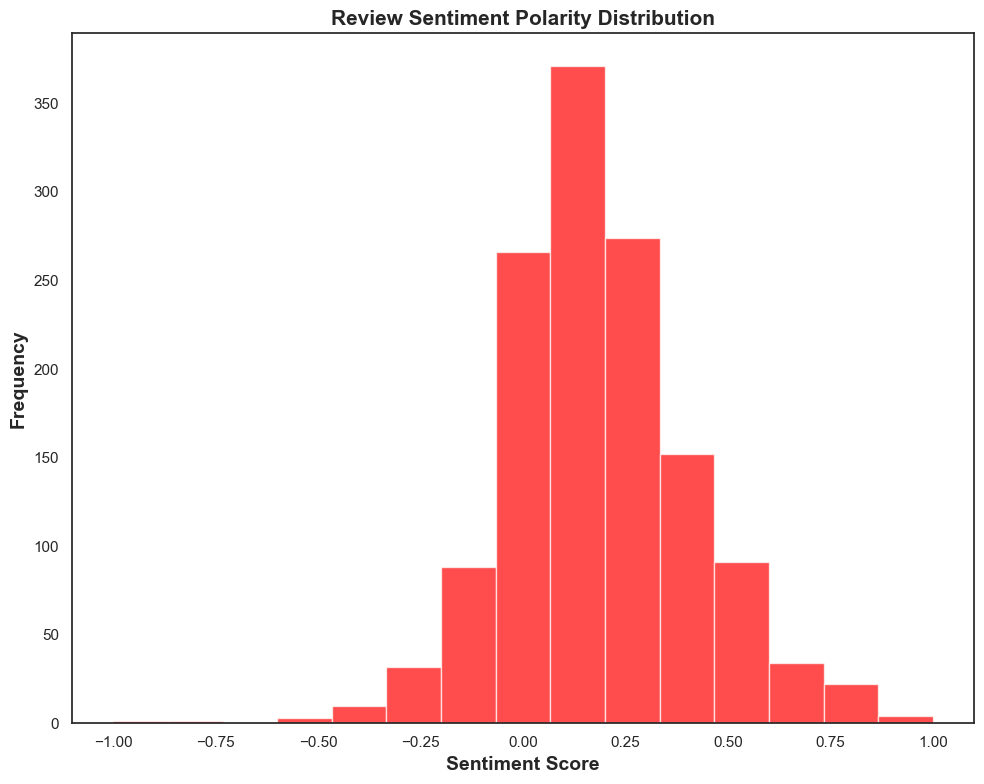

In [91]:
# Create and plot a histogram for the review_sentiment column.
review_histogram = plt.hist(df3_copy['review_sentiment_score'], bins=15, color='red', alpha=0.7)
plt.title('Review Sentiment Polarity Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Sentiment Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the histogram.
plt.savefig('review_sentiment_histogram.png', dpi=72)

In [92]:
# Create a new column indicating whether a reviews sentiment is either positive, negative or neutral.
# Define a function to categorise polarity scores.
def categorise_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the reviews.
df3_copy['review_sentiment'] = df3_copy['review_sentiment_score'].apply(categorise_sentiment)

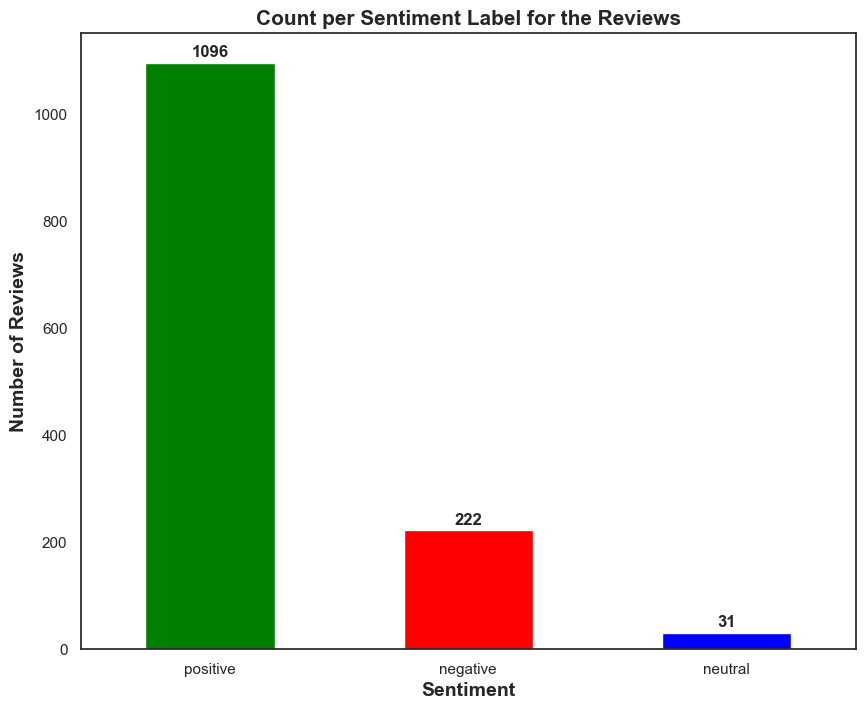

In [93]:
# Count the number of reviews in each sentiment category.
sentiment_count_review = df3_copy['review_sentiment'].value_counts()

# Create a barplot.
review_sentiment_barplot = sentiment_count_review.plot(kind='bar', color=['green', 'red', 'blue']) 
plt.title('Count per Sentiment Label for the Reviews', fontsize=15, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Add data points to the bars.
for i, v in enumerate(sentiment_count_review):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Save the barplot.
plt.savefig('review_sentiment_barplot.png', dpi=72)

In [94]:
# Use the describe function on the summary_sentiment column to show the distribution and moments.
df3_copy['summary_sentiment_score'].describe().round(2)

count    1349.00
mean        0.27
std         0.35
min        -1.00
25%         0.00
50%         0.25
75%         0.50
max         1.00
Name: summary_sentiment_score, dtype: float64

Overall, the summaries within the dataset have a wide range of sentiments. This is illustrated by the minimum score of -1 and the maximum score of 1. However, most summaries are either neutral or mildly positive sentiments, demonstrated by the 25th percentile sentiment score of 0 and the median score of 0.25. The mean score of 0.27 shows the dataset has an overall marginally positive sentiment. Even so, the standard deviation score of 0.35 highlights the considerable variation in sentiment across the summaries. This emphasises the diverse nature of the dataset, where some summaries demonstrate strong positive or negative sentiments, while others are neutral.

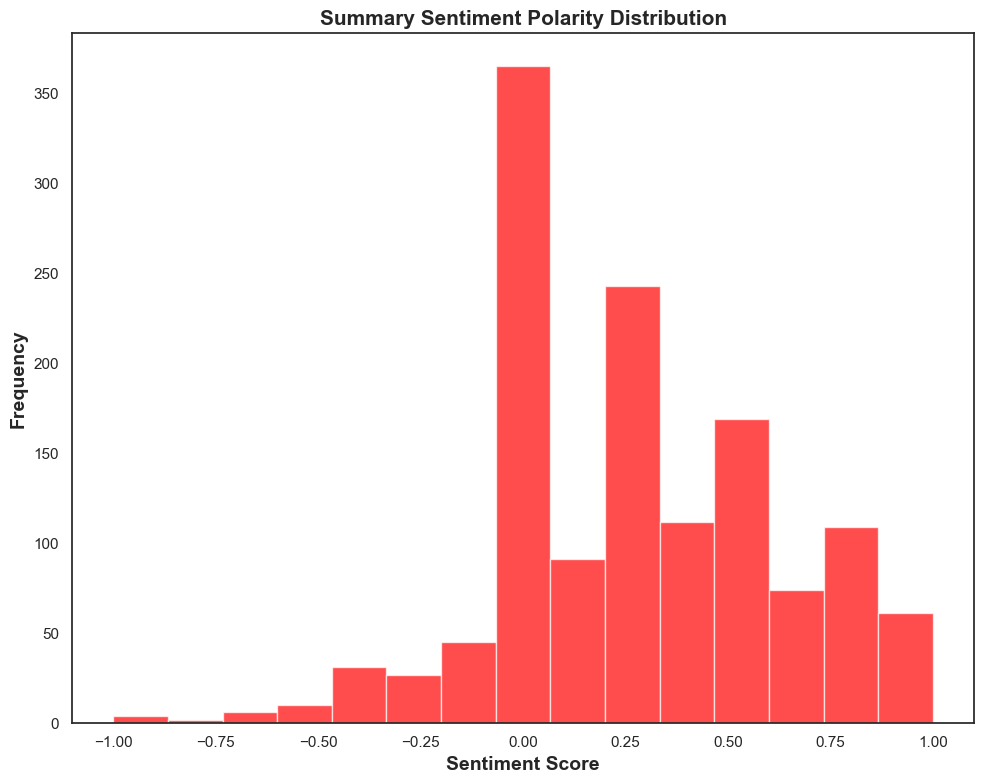

In [95]:
# Create and plot a histogram for the summary_sentiment column.
summary_histogram = plt.hist(df3_copy['summary_sentiment_score'], bins=15, color='red', alpha=0.7)
plt.title('Summary Sentiment Polarity Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Sentiment Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Adjust the layout for better appearance.
plt.tight_layout()

# Save the histogram.
plt.savefig('summary_sentiment_histogram.png', dpi=72)

In [96]:
# Create a new column and apply the categories_sentiment function to see whether a summary, 
# is either positive, negative or neutral.
df3_copy['summary_sentiment'] = df3_copy['summary_sentiment_score'].apply(categorise_sentiment)

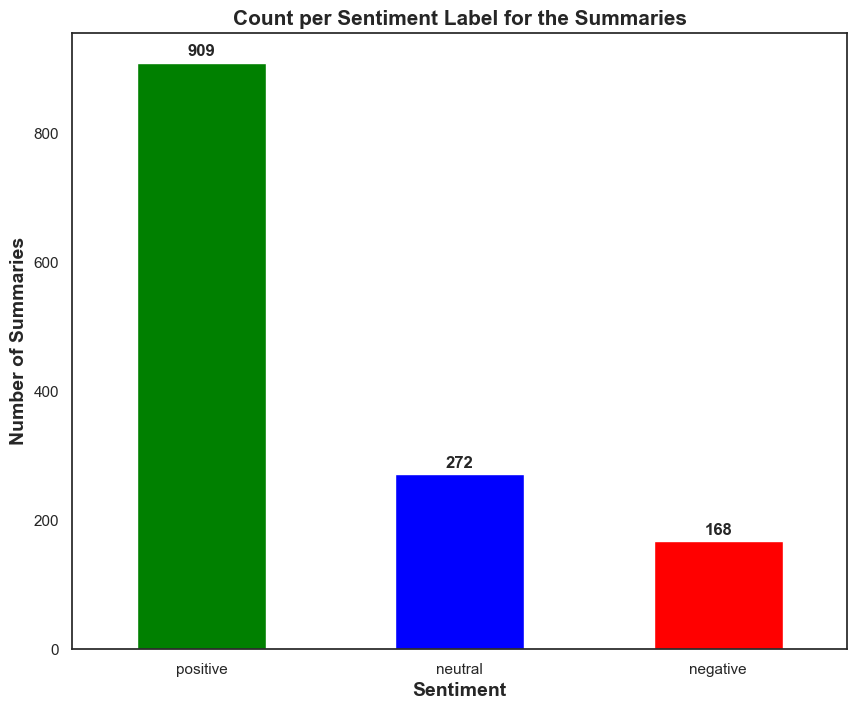

In [97]:
# Count the number of summaries in each sentiment category.
sentiment_count_summary = df3_copy['summary_sentiment'].value_counts()

# Create a barplot.
summary_sentiment_barplot = sentiment_count_summary.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Count per Sentiment Label for the Summaries', fontsize=15, fontweight='bold' )
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Summaries', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Add data points to the bars.
for i, v in enumerate(sentiment_count_summary):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Save the barplot.
plt.savefig('summary_sentiment_barplot.png', dpi=72)

In [98]:
# Sort by sentiment in descending order for the top 20 positive reviews.
top20_positive_reviews = df3_copy.sort_values(by='review_sentiment_score', ascending=False).head(20)

# Print the top 20 positive reviews.
print("Top 20 Positive Reviews:")
for idx, row in top20_positive_reviews.iterrows():
    print(f"Review {idx}: {row['review']}")
    print(f"Sentiment Score: {row['review_sentiment_score']:.2f}")
    print()

Top 20 Positive Reviews:
Review 564: perfect
Sentiment Score: 1.00

Review 1080: my daughter loves her stickers awesome seller thank you 
Sentiment Score: 1.00

Review 1334: perfect for tutoring my grandson in spelling
Sentiment Score: 1.00

Review 890: the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy
Sentiment Score: 0.88

Review 498: great quality very cute and perfect for my toddler
Sentiment Score: 0.82

Review 1333: this is a great tool to have at hand when playing quiddler
Sentiment Score: 0.80

Review 336: great seller happy with my purchase 5 starrrr
Sentiment Score: 0.80

Review 1287: prompt service and a great product
Sentiment Score: 0.80

Review 1187: a great creation tool it helps me concentrate
Sentiment Score: 0.80

Review 824: husband seems happy with it
Sentiment Score: 0.80

Review 828: great price arrived on time with no damage will be a great addition t

In [99]:
# Sort by sentiment in descending order for the top 20 negative reviews.
top20_negative_reviews = df3_copy.sort_values(by='review_sentiment_score', ascending=True).head(20)

# Print the top 20 negative reviews.
print("Top 20 Negative Reviews:")
for idx, row in top20_negative_reviews.iterrows():
    print(f"Review {idx}: {row['review']}")
    print(f"Sentiment Score: {row['review_sentiment_score']:.2f}")
    print()

Top 20 Negative Reviews:
Review 165: booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not
Sentiment Score: -1.00

Review 147: incomplete kit very disappointing
Sentiment Score: -0.78

Review 267: one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it
Sentiment Score: -0.55

Review 90: i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift
Sentiment Score: -0.50

Review 141: i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed
S

In [100]:
# Sort by sentiment in descending order for the top 20 positive summaries.
top_positive_summaries = df3_copy.sort_values(by='summary_sentiment_score', ascending=False).head(20)

# Print the top 20 positive summaries.
print("Top 20 Positive Summaries:")
for idx, row in top_positive_summaries.iterrows():
    print(f"Summary {idx}: {row['summary']}")
    print(f"Sentiment Score: {row['summary_sentiment_score']:.2f}")
    print()

Top 20 Positive Summaries:
Summary 150: awesome
Sentiment Score: 1.00

Summary 541: perfect tool for learning how to tell time one on one with your child
Sentiment Score: 1.00

Summary 337: excellent
Sentiment Score: 1.00

Summary 581: one of the best games ever
Sentiment Score: 1.00

Summary 1080: awesome seller thank you
Sentiment Score: 1.00

Summary 776: best dungeon crawler
Sentiment Score: 1.00

Summary 1078:  loves stickers and she loves peppa so this was perfect
Sentiment Score: 1.00

Summary 982: awesome expansion
Sentiment Score: 1.00

Summary 720: best one in the series
Sentiment Score: 1.00

Summary 737: excellent introduction to dungeons and dragons
Sentiment Score: 1.00

Summary 1062: wonderful gift
Sentiment Score: 1.00

Summary 389: excellent therapy tool
Sentiment Score: 1.00

Summary 544: excellent onthego teaching tool
Sentiment Score: 1.00

Summary 996: wonderful and
Sentiment Score: 1.00

Summary 407: the pigeon is the perfect addition to a school library
Sentiment

In [101]:
# Filter the DataFrame to include only summaries with a sentiment score of 1.00 due to the top 20 all having the same score.
positive_summaries = df3_copy[df3_copy['summary_sentiment_score'] == 1.00]

# Count the number of positive summaries with a sentiment score of 1.00.
positive_summaries_count = len(positive_summaries)

# Print the count of positive summaries with a sentiment score of 1.00.
print(f"The number of summaries with the most positive score is {positive_summaries_count}\n")

# Print the positive summaries with a sentiment score of 1.00.
print("Positive Summaries:")
for idx, row in positive_summaries.iterrows():
    print(f"Summary {idx}: {row['summary']}")
    print(f"Sentiment Score: {row['summary_sentiment_score']:.2f}")
    print()

The number of summaries with the most positive score is 56

Positive Summaries:
Summary 5: best gm screen ever
Sentiment Score: 1.00

Summary 23: wonderful designs
Sentiment Score: 1.00

Summary 27: perfect
Sentiment Score: 1.00

Summary 61: theyre the perfect size to keep in the car or a diaper 
Sentiment Score: 1.00

Summary 107: perfect for preschooler
Sentiment Score: 1.00

Summary 112: awesome sticker activity for the price
Sentiment Score: 1.00

Summary 132: awesome book
Sentiment Score: 1.00

Summary 133: he was very happy with his gift
Sentiment Score: 1.00

Summary 150: awesome
Sentiment Score: 1.00

Summary 166: awesome and welldesigned for 9 year olds
Sentiment Score: 1.00

Summary 337: excellent
Sentiment Score: 1.00

Summary 389: excellent therapy tool
Sentiment Score: 1.00

Summary 407: the pigeon is the perfect addition to a school library
Sentiment Score: 1.00

Summary 423: best easter teaching tool
Sentiment Score: 1.00

Summary 462: wonderful
Sentiment Score: 1.00

Su

Instead of a top 20 positive summaries, there are 56 summaries with the same highest score.

In [102]:
# Sort by sentiment in descending order for the top 20 negative summaries.
top20_negative_summaries = df3_copy.sort_values(by='summary_sentiment_score', ascending=True).head(20)

# Print the top 20 negative summaries.
print("Top 20 Negative Summaries:")
for idx, row in top20_negative_summaries.iterrows():
    print(f"Summary {idx}: {row['summary']}")
    print(f"Sentiment Score: {row['summary_sentiment_score']:.2f}")
    print()

Top 20 Negative Summaries:
Summary 165: boring unless you are a craft person which i am 
Sentiment Score: -1.00

Summary 587: boring
Sentiment Score: -1.00

Summary 17: the worst value ive ever seen
Sentiment Score: -1.00

Summary 837: before this i hated running any rpg campaign dealing with towns because it 
Sentiment Score: -0.90

Summary 1: another worthless dungeon masters screen from galeforce9
Sentiment Score: -0.80

Summary 116: disappointed
Sentiment Score: -0.75

Summary 266: promotes anger instead of teaching calming methods
Sentiment Score: -0.70

Summary 637: bad qualityall made of paper
Sentiment Score: -0.70

Summary 634: too bad this is not what i was expecting
Sentiment Score: -0.70

Summary 144: at age 31 i found these very difficult to make 
Sentiment Score: -0.65

Summary 75: small and boring
Sentiment Score: -0.62

Summary 368: mad dragon
Sentiment Score: -0.62

Summary 575: disappointing
Sentiment Score: -0.60

Summary 723: then you will find this board game to be